$\textbf{HERA Memo A. Primary Beam Simulation}$


$\textbf{Introduction}$

Modeling antenna primary beam of drift-scan interferometer is one of chief challanges in 21-cm cosmological observations. However, recent promising developments of modeling primary beam have come through CST simulation, using a drone & holographic beam mapping, satelite and through visibility data by tracking of single primary (citatio). In this work, we consider three basic beam models; Gaussian beam, Airy disk beam and beam model based on Geometric Optics.

references
https://www.researchgate.net/publication/335028403_Electrical_and_electromagnetic_co-simulations_of_the_HERA_Phase_I_receiver_system_including_the_effects_of_mutual_coupling_and_impact_on_the_EoR_window/figures?lo=1
https://www.jstor.org/stable/10.1086/683467?seq=1#metadata_info_tab_contents
https://www.researchgate.net/publication/304965023_Holographic_Beam_Mapping_of_the_CHIME_Pathfinder_Array

$\textbf{Section. 1.1 : Gaussian Primary Beam Model}$

The simplest primary beam model is Gaussain beam, it a good approximation of main lobe. It is a good enough to capture antenna-to-antenna variation due to pointing errors and spectral variation of ful l-width-half-maximum. A two dimensional Gaussian beam centered at origin (assuming the origin coincide with phase center) and   measure at angular co-ordinate $(\theta,\phi)$
\begin{equation}
        \textit{A}(\theta,\phi,\lambda)= \frac{1}{\sqrt{2\pi(\sigma + \varepsilon_{\sigma})^2}}\textit{e}^{-\frac{(\theta + \varepsilon_{\theta})^2 + (\phi+ \varepsilon_{\phi})^2}{2(\sigma +\varepsilon_{\sigma})^2}}
\end{equation}

where $\varepsilon_{\theta}$ and $\varepsilon_{\phi}$ are pointing errors, and $\varepsilon_{\sigma}$ is spectral variation of ful l-width-half-maximum  $\sigma$, is  approximated by Rayleigh diffraction limit
\begin{equation}
        \sigma \approx 1.22\frac{\lambda}{\textit{D}}
\end{equation}

. Here $\textit{D}$ dish diameter.

reference

https://courses.lumenlearning.com/austincc-physics2/chapter/27-6-limits-of-resolution-the-rayleigh-criterion/


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import time
import get_ants_response
from scipy.integrate import quad as qd
from scipy import special as sp


In [100]:
#2dGuassian beam

#primary beam function

def gaussian_beam(theta,phi,sigma_fwhm,e_theta,e_phi,e_sigma):
    """
    This function compute the 2d gassian beam for full width half maximum,sigma_fwhm,
    value at location theta,phi (radians)
    """
    
    #Guassian Primary beam
    gpbeam = 1.0/np.sqrt(2.0*np.pi*(sigma_fwhm + e_sigma)**2)*np.exp(-((theta + e_theta)**2 + (phi + e_phi)**2)/2.0*(sigma_fwhm + e_sigma)**2)
    
    return gpbeam

def sigma_func(d,freq_i):
    """
    This function compute the sigma_fwhm base on the Limits of Resolution: The Rayleigh Criterion
    
    
    """
    lambda_ = 3.0*10**8/freq_i # frequency in Hertz
    sigma = 1.22*lambda_/d
    return sigma
    
    
    

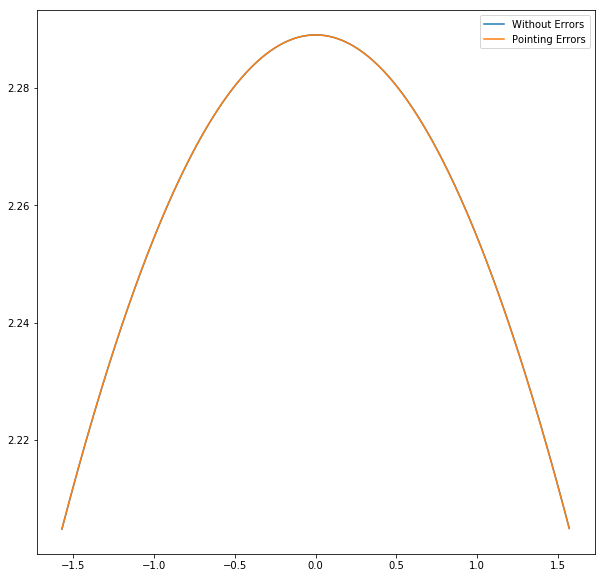

In [108]:
#1d Gaussain with and without beam size and point errors

theta, phi = np.arange(-np.pi/2.0,np.pi/2.0,0.01),np.arange(-np.pi,np.pi,0.1)

e_theta,e_phi = np.random.normal(0.0,np.deg2rad(0.2)), np.random.normal(0.0,np.deg2rad(0.2))  
sigma_err = np.random.normal(0.0,np.deg2rad(0.2)) # 0.1 degree

gaussian = [gaussian_beam(theta[i],0.0,sigma_fwhm,0.0,0.0,0.0) for i in range(len(theta))]
gaussian_beam_pt_errors = [gaussian_beam(theta[theta_j],0.0,sigma_fwhm,e_theta,0.0,0.0) for theta_j in range(len(theta))]
gaussian_beam_sigma_errors = [gaussian_beam(theta[theta_j],0.0,sigma_fwhm,0.0,0.0,sigma_err) for theta_j in range(len(theta))]
gaussian_beam_pt_sigma_errors = [gaussian_beam(theta[theta_j],0.0,sigma_fwhm,e_theta,0.0,sigma_err) for theta_j in range(len(theta))]


plt.figure(figsize=(10,10))
plt.plot(theta,gaussian,label='Without Errors')
plt.plot(theta,gaussian_beam_pt_errors,label='Pointing Errors')
#plt.plot(theta,gaussian_beam_sigma_errors,label='Beam Size Errors')
#plt.plot(theta,gaussian_beam_sigma_errors,label='Beam Size & Pointing Errors')
plt.legend(loc='best')



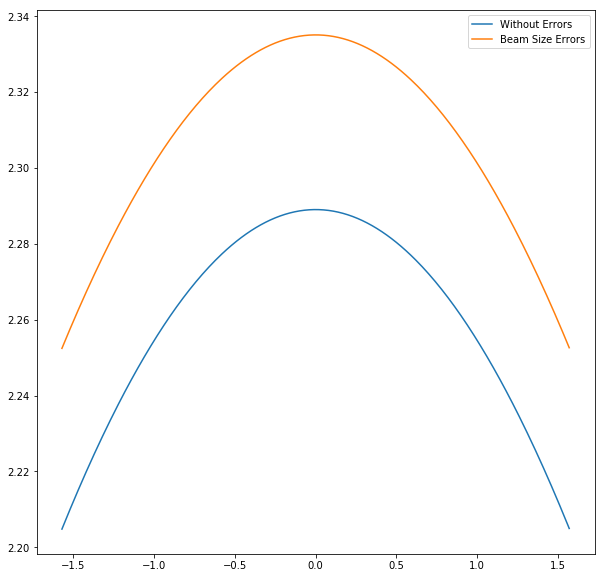

In [112]:
plt.figure(figsize=(10,10))
plt.plot(theta,gaussian,label='Without Errors')
plt.plot(theta,gaussian_beam_sigma_errors,label='Beam Size Errors')
plt.legend(loc='best')



In [111]:
plt.tick_params?

In [87]:
theta, phi = np.arange(-np.pi/2.0,np.pi/2.0,0.1),np.arange(-np.pi,np.pi,0.1)

freq = np.arange(50.0,350.0)*10**6 # Hz

mid_freq = 150e6 #mid frequency

sigma_fwhm = sigma_func(14.0,mid_freq) # fullwidth-half-maxum for HERA-dish of 14.0 m diameter

#pointing errors

e_theta,e_phi = np.random.normal(0.0,np.deg2rad(0.2)), np.random.normal(0.0,np.deg2rad(0.2))  
sigma_err = np.random.normal(0.0,np.deg2rad(0.2)) # 0.1 degree


gaussin_2d =np.zeros((len(phi),len(theta)),dtype=np.float32)
gaussin_2d_pnt_errors = np.zeros((len(phi),len(theta)),dtype=np.float32)
gaussin_2d_sigma_errors = np.zeros((len(phi),len(theta)),dtype=np.float32)
gaussin_2d_pnt_sigma_errors = np.zeros((len(phi),len(theta)),dtype=np.float32)
for phi_i in range(len(phi)):
    for theta_j in range(len(theta)):
        
        #print theta_j,phi_i, gaussin_2d[phi_i][theta_j],gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        
        gaussin_2d[phi_i][theta_j] = gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        gaussin_2d_pnt_errors[phi_i][theta_j] = gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,e_theta,e_phi,0.0)
        gaussin_2d_sigma_errors[phi_i][theta_j] = gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,sigma_err)
        gaussin_2d_pnt_sigma_errors[phi_i][theta_j] = gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,e_theta,e_phi,sigma_err)

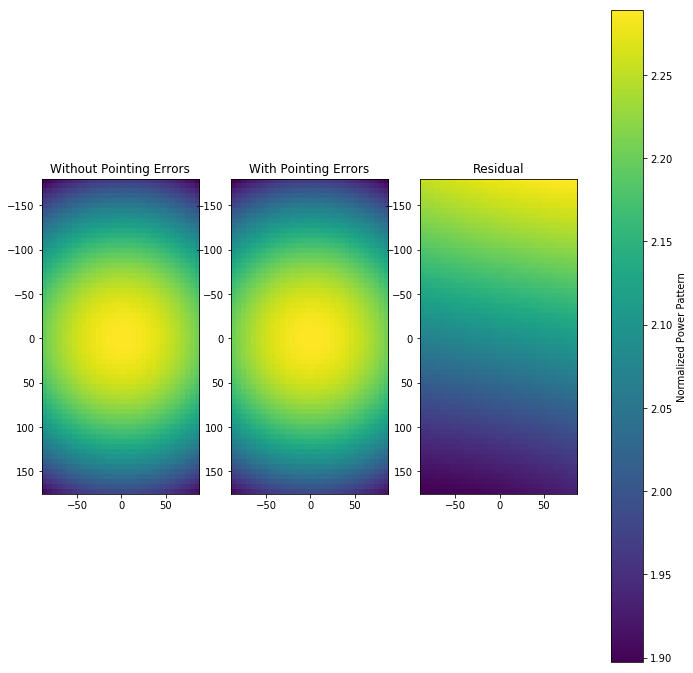

In [81]:
#Guassian Beam with and without Point Errors

extent =[np.rad2deg(theta[0]),np.rad2deg(theta[-1]),np.rad2deg(phi[-1]),np.rad2deg(phi[0])]
res_pnt_error = gaussin_2d - gaussin_2d_pnt_errors
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
axes = (ax1,ax2,ax3)
im = ax1.imshow(gaussin_2d_pnt_errors,extent=extent)
ax1.imshow(gaussin_2d,extent=extent)
ax1.set_title('Without Pointing Errors')
ax2.imshow(gaussin_2d_pnt_errors,extent=extent)
ax2.set_title('With Pointing Errors')
ax3.imshow(res_pnt_error,extent=extent)
ax3.set_title('Residual')
fig.colorbar(im,ax=axes,label= r'Normalized Power Pattern')


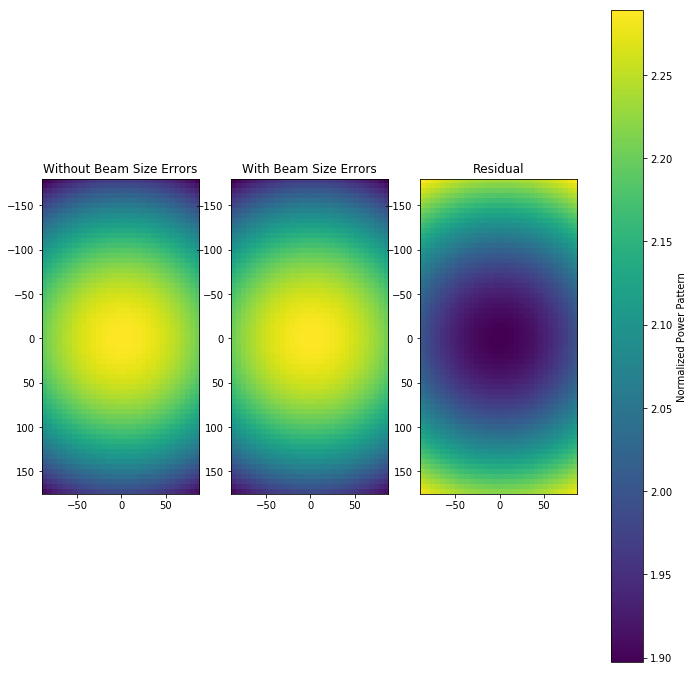

In [83]:
#Gaussian Beam with and without beam size errors
extent =[np.rad2deg(theta[0]),np.rad2deg(theta[-1]),np.rad2deg(phi[-1]),np.rad2deg(phi[0])]
res_simgam_errors = gaussin_2d - gaussin_2d_sigma_errors
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
axes = (ax1,ax2,ax3)
im = ax1.imshow(gaussin_2d_pnt_errors,extent=extent)
ax1.imshow(gaussin_2d,extent=extent)
ax1.set_title('Without Beam Size Errors')
ax2.imshow(gaussin_2d_sigma_errors,extent=extent)
ax2.set_title('With Beam Size Errors')
ax3.imshow(res_simgam_errors,extent=extent)
ax3.set_title('Residual')
fig.colorbar(im,ax=axes,label= r'Normalized Power Pattern')

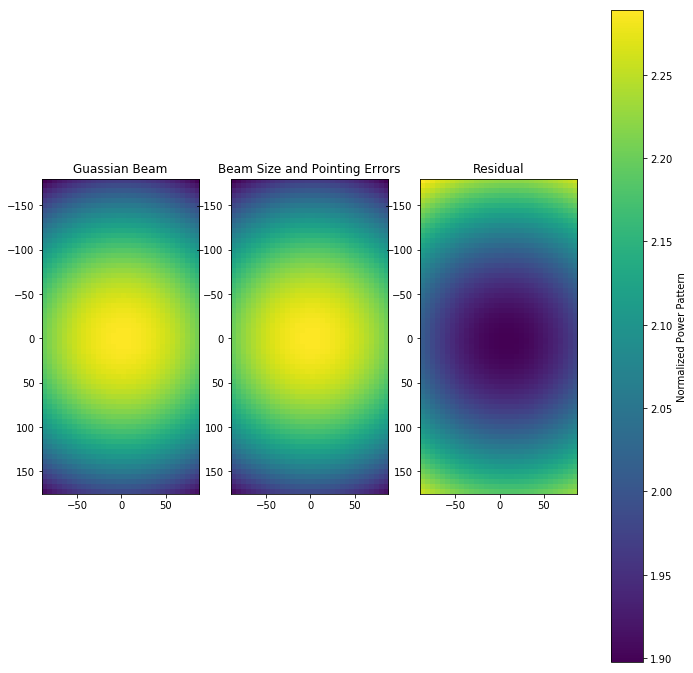

In [88]:

#Gaussian Beam with and without beam size and point errors
extent =[np.rad2deg(theta[0]),np.rad2deg(theta[-1]),np.rad2deg(phi[-1]),np.rad2deg(phi[0])]
res_pnt_sigma_errors = gaussin_2d - gaussin_2d_pnt_sigma_errors
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
axes = (ax1,ax2,ax3)
im = ax1.imshow(gaussin_2d_pnt_errors,extent=extent)
ax1.imshow(gaussin_2d,extent=extent)
ax1.set_title('Guassian Beam')
ax2.imshow(gaussin_2d_pnt_sigma_errors,extent=extent)
ax2.set_title('Beam Size and Pointing Errors')
ax3.imshow(res_pnt_sigma_errors,extent=extent)
ax3.set_title('Residual')
fig.colorbar(im,ax=axes,label= r'Normalized Power Pattern')


$\textbf{Section. 1.2 : Airy Disk Primary Beam Model}$


If define the size of feed cage as $\textit{d}$, parabolic dish reflector with $\textit{D}$, and $\lambda$ as observing wavelength, then assuming a circular aperture with uniform illumination; the Airy disk beam model  centered at origin is

\begin{equation}
        \textit{A}(\theta,\phi)= \textit{f}(\theta)\textit{e}^{j(\phi +\varepsilon_{\phi})}
\end{equation}

where $\textit{f}(\theta)$ is
\begin{equation}
         \frac{\textit{J}_1(\textit{a}\sin(\theta +\varepsilon_{\theta})) − \textit{b}\textit{J}_1(\textit{b}\textit{a}\sin(\theta +\varepsilon_{\theta})}{\textit{a}\sin(\theta +\varepsilon_{\theta})(1 − \textit{b}^2 )/2}
\end{equation}
where $\textit{a}=1.22\pi/(\sigma + \varepsilon_{\sigma})$ is the beam size [1]. $\textit{J}_1$ is Bessel function of first order and  $\textit{b} = \textit{d}/\textit{D}$ is a blocking factor.


reference


[1] Wilson Rohlfs Hultemeister. ’Tools of Radio Astronomy (5th Ed)’.


[2] https://arxiv.org/pdf/1809.09728.pdf

In [141]:
#Airdisk beam model

def airdisk_beam(theta_i,phi_i,d_diam,d_block,e_theta,e_phi,sigma_error,freq_i):
    "This function compute airy disk beam model"
    
    beam_size = 1.22*np.pi/(sigma_func(d_diam,freq_i)+ sigma_error)
    b_block =d_block/d_diam
    numarator = sp.j1(beam_size*np.sin(theta_i + e_theta)) -b_block*sp.j1(b_block*beam_size*np.sin(theta_i + e_theta))
    denominator = beam_size*np.sin(theta_i + e_theta)*(1- b_block**2)/2.0
    airdisk_1d = numarator/denominator
    airdisk_2d = airdisk_1d*np.exp(1j*(phi_i + e_phi))
    
    return airdisk_2d



    

    

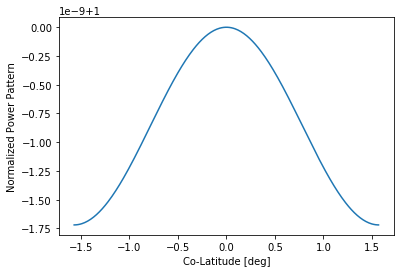

In [143]:
theta, phi = np.arange(-np.pi/2.0,np.pi/2.0,0.01),np.arange(-np.pi,np.pi,0.1)

e_theta,e_phi = np.random.normal(0.0,np.deg2rad(0.2)), np.random.normal(0.0,np.deg2rad(0.2))  
sigma_err = np.random.normal(0.0,np.deg2rad(0.2)) # 0.1 degree

d_diam = 14.0 #meters 
d_block = 0.0 #meters

freq_mid = 800 #Mhz

airydisk_1_d = [airdisk_beam(theta[i],0.0,d_diam,d_block,0.0,0.0,0.0,freq_mid) for i in range(len(theta))]
airydisk_2_d = np.zeros((len(phi),len(theta)))

for phi_i in range(len(phi)):
    for theta_j in range(len(theta)):
        airydisk_2_d[phi_i][theta_j] = np.abs(airdisk_beam(theta[theta_j],phi[phi_i],d_diam,d_block,0.0,0.0,0.0,freq_mid))

plt.plot(theta,airydisk_1_d)
plt.xlabel('Co-Latitude [deg]')
plt.ylabel('Normalized Power Pattern')
plt.show()



$\textbf{Section. 1.3 : Geometric Optics Primary Beam Model}$

Suppose a parabolic dish is place at the $\textrm{xz-plane}$ such that the vertex of the dish coincide with the $\textrm{xz-plane}$ origin, with a focus length $\textit{h}_{\textrm{feed}}$ above the origin and the shape of the dish is give by $\textit{z}= \frac{\textit{x}^2}{4\textit{h}_{\textrm{feed}}}$,see Figure below. 

![alt text](far-field.png"Title")

The schematic diagram depict the HERA-like antenna element in $\textrm{xz-plane}$]{The schematic diagram depict the HERA-like antenna element in $\textrm{xz-plane}$ with light ray coming from a radio source at far-field distance $\mathbf{h}$, striking the dish surface at $(\textit{x},\textit{z})$ and bouncing to the feed at height $\textit{h}_{\textrm{feed}}$ above the dish vertex


The total path traveled by a light ray from height $\mathbf{h}_{\textrm{far}}$ (far-field distance $|\mathbf{h}_{\textrm{far}}|=2\frac{\textit{D}^2}{\lambda}$) straight above the dish, reflecting from the dish surface at point $\textit{P}(\textit{x},\textit{z})$ to focus at $\textit{F}(0,\textit{h}_{\textrm{feed}})$ is
 \begin{equation}
    \textit{L}_{\textrm{Total}}(\textit{x},\textit{z},\theta,\Delta \textit{h}_{\textrm{feed}})= \textit{x}\sin(\theta) -\textit{z}\cos(\theta) + |\mathbf{h}_{\textrm{far}}| + \sqrt{ \textit{x}^2 +(\Delta \textit{h}_{\textrm{feed}} -\textit{z})^2}
\end{equation}
where $\Delta \textit{h}_{\textrm{feed}} =\sqrt{\delta \textit{x}^2 +(\textit{h}_{\textrm{feed}}-\delta \textit{z})^2}$
. The instrumental angular response model for antenna $\textit{a}$ with a dish diameter $\textit{D}$ observing at frequency $\nu$ is
\begin{equation}
    \textit{A}_{\textit{a}}(\theta,\nu,\Delta \textit{h}_{\textrm{feed}}) = \frac{|\textit{E}_{\textit{a}}(\theta,\nu,\Delta \textit{h}_{\textrm{feed}})|^2}{\textit{Z}_0}
\end{equation}
where is characteristic impedance of free space, $\textit{Z}_0=377$ Ohms .The electric field intensity measured at co-altitude angle $\theta$ is
\begin{equation}
    \textit{E}(\theta,\nu,\Delta \textit{h}_{\textrm{feed}})=  \int_{-\textit{D}/2}^{\textit{D}/2}\textit{E}_{\textrm{ds}}(\textit{x},\textit{z},\nu) \textit{e}^{j\psi(\textit{x},\textit{z},\theta,\Delta \textit{h}_{\textrm{feed}})}\sqrt{1+ \Big(\frac{\textit{x}}{4\textit{h}_{\textrm{feed}}}\Big)^2}d\textit{x}
\end{equation}
where 
\begin{equation}
    \psi = 2\pi\frac{\textit{L}_{\textrm{Total}}(\textit{x},\textit{z},\theta,\Delta \textit{h}_{\textrm{feed}})}{\lambda}
\end{equation}

$\textit{E}_{\textrm{ds}}(\textit{x},\textit{z},\nu) =\textit{D}(\textit{x},\textit{z})\textit{E}_{\textit{src}}(\nu)$ is the product of the $\textit{D}(\textit{x},\textit{z})$ dish surface roughness function and $\textit{E}_{\textit{src}}(\nu)$ is the amplitude of radio source coming from direction $\theta$ and is related to the radio source flux density by

\begin{equation}
    \textit{E}_{\textit{src}}(\nu) = \sqrt{\textit{c}\mu_0 \textit{F}_{\nu}}
\end{equation}

here $\textit{c}$ the speed of light in vacuum and $\mu_0$ is the permeability of free space. $\textit{F}_{\nu}$ is sum of all radio sources contributions from location $\theta$ in the sky. Assuming that the dish surface is symmetric about $\textit{z}$-axis, and rotating the about $\textit{z}$-axis for full azimuth angle $\phi$, then the instrumental angular response is
\begin{equation}
     \textit{A}_{\textit{a}}(\theta,\phi,\nu,\Delta \textit{h}_{\textrm{feed}})= \textit{A}_{\textit{a}}(\theta,\nu,\Delta \textit{h}_{\textrm{feed}})\textit{e}^{j\phi}
\end{equation}
